In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('Dallas data summary Interpolated lag 6.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,121.62157,5.93,37170.0,5816.4070,5.3,284456.5080,1309.5483,43.20%,133706.0000,2.30%,4281,4.19,188.90
1,4/1/2005,121.66380,5.86,37443.3,5834.7074,5.1,286767.0694,1303.3853,43.27%,133866.0000,2.30%,5548,4.69,189.67
2,5/1/2005,122.11284,5.72,37716.6,5853.0078,5.1,289077.6308,1297.2223,43.33%,134026.0000,2.30%,4878,4.58,190.44
3,6/1/2005,122.20399,5.58,37989.9,5871.3082,5.4,291388.1922,1291.0593,43.40%,134186.0000,2.30%,5304,4.83,191.21
4,7/1/2005,121.91083,5.70,38263.2,5889.6086,5.4,293698.7536,1284.8963,43.40%,134134.6667,2.30%,5140,5.06,191.98
5,8/1/2005,121.32849,5.82,38536.5,5907.9090,5.2,296009.3150,1278.7333,43.40%,134083.3333,2.30%,6042,4.36,192.75
6,9/1/2005,121.52173,5.77,38809.8,5926.2094,5.1,298319.8764,1272.5703,43.40%,134032.0000,2.30%,4361,4.39,193.52
7,10/1/2005,122.39961,6.07,39083.1,5944.5098,4.8,300630.4378,1266.4073,43.33%,134201.0000,2.37%,4814,4.45,194.29
8,11/1/2005,123.28627,6.33,39356.4,5962.8102,5.0,302940.9992,1260.2443,43.27%,134370.0000,2.43%,4713,4.34,195.06
9,12/1/2005,124.49855,6.27,39629.7,5981.1106,4.8,305251.5606,1254.0813,43.20%,134539.0000,2.50%,5458,4.32,195.83


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,121.62157,5.93,37170.0,5816.4070,5.3,284456.5080,1309.5483,133706.0000,4281,4.19,188.90,43.20,2.3
1,4/1/2005,121.66380,5.86,37443.3,5834.7074,5.1,286767.0694,1303.3853,133866.0000,5548,4.69,189.67,43.27,2.3
2,5/1/2005,122.11284,5.72,37716.6,5853.0078,5.1,289077.6308,1297.2223,134026.0000,4878,4.58,190.44,43.33,2.3
3,6/1/2005,122.20399,5.58,37989.9,5871.3082,5.4,291388.1922,1291.0593,134186.0000,5304,4.83,191.21,43.40,2.3
4,7/1/2005,121.91083,5.70,38263.2,5889.6086,5.4,293698.7536,1284.8963,134134.6667,5140,5.06,191.98,43.40,2.3


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,37170.0,5816.40700,5.3,284456.5080,1309.548300,133706.0000,4281,4.19,188.900000,43.20,2.30
1,5.86,37443.3,5834.70740,5.1,286767.0694,1303.385300,133866.0000,5548,4.69,189.670000,43.27,2.30
2,5.72,37716.6,5853.00780,5.1,289077.6308,1297.222300,134026.0000,4878,4.58,190.440000,43.33,2.30
3,5.58,37989.9,5871.30820,5.4,291388.1922,1291.059300,134186.0000,5304,4.83,191.210000,43.40,2.30
4,5.70,38263.2,5889.60860,5.4,293698.7536,1284.896300,134134.6667,5140,5.06,191.980000,43.40,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...
143,4.17,54119.5,7346.98525,4.1,480475.5779,764.450767,138161.3333,4914,3.98,221.623417,35.23,1.43
144,4.20,54369.0,7356.87350,3.9,482774.9358,765.470050,138819.0000,6397,3.93,221.998833,35.30,1.40
145,4.05,54618.5,7366.76175,3.5,485074.2938,766.489333,139423.6667,4205,3.69,222.374250,35.23,1.33
146,4.01,54868.0,7376.65000,3.6,487373.6517,767.508617,140028.3333,4995,3.77,222.749667,35.17,1.27


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),148.0,4.804324,1.043601,3.3500,3.935000,4.475000,5.920000,6.76000
Personal_Income,148.0,45530.780405,4816.825307,37170.0000,41061.000000,45400.166665,50150.750000,55117.50000
Resident_Population,148.0,6611.558937,417.160175,5816.4070,6334.664792,6549.631709,6943.884604,7386.53825
Unemployment_Rate,148.0,5.602027,1.529504,3.5000,4.275000,5.200000,6.800000,8.70000
GDP,148.0,375344.184486,55581.883218,284456.5080,330962.570775,360750.889650,422541.368650,489673.00960
Crime_Rate,148.0,849.819469,217.702552,663.7371,678.926779,742.509712,1014.683012,1309.54830
Median_Debt,148.0,133148.000000,3406.861198,127063.0000,130186.000000,134160.333350,135831.250000,140633.00000
New_Structures,148.0,3327.500000,1362.068757,1098.0000,2176.750000,3281.000000,4355.750000,7374.00000
Economic_Conditions_Index,148.0,3.302568,2.128434,-4.4600,3.487500,4.015000,4.442500,5.22000
CPI all items less shelter,148.0,213.502171,9.998330,188.9000,207.251125,218.987625,221.305771,224.78000


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.078645,-1.735745,-1.906107,-0.197467,-1.635203,2.111729,0.163787,0.700038,0.416941,-2.460628,0.858097,-0.631014
1,1.011570,-1.679006,-1.862238,-0.328229,-1.593633,2.083420,0.210751,1.630241,0.651856,-2.383615,0.881448,-0.631014
2,0.877419,-1.622268,-1.818369,-0.328229,-1.552062,2.055111,0.257715,1.138342,0.600175,-2.306602,0.901464,-0.631014
3,0.743268,-1.565529,-1.774500,-0.132087,-1.510492,2.026801,0.304679,1.451101,0.717632,-2.229589,0.924815,-0.631014
4,0.858255,-1.508791,-1.730631,-0.132087,-1.468922,1.998492,0.289612,1.330696,0.825693,-2.152576,0.924815,-0.631014
...,...,...,...,...,...,...,...,...,...,...,...,...
143,-0.607822,1.783066,1.762935,-0.982035,1.891469,-0.392135,1.471540,1.164772,0.318277,0.812260,-1.800629,-1.547015
144,-0.579076,1.834864,1.786639,-1.112796,1.932838,-0.387453,1.664582,2.253557,0.294786,0.849808,-1.777277,-1.578601
145,-0.722809,1.886662,1.810343,-1.374319,1.974206,-0.382771,1.842067,0.644241,0.182027,0.887356,-1.800629,-1.652303
146,-0.761138,1.938459,1.834046,-1.308938,2.015575,-0.378089,2.019552,1.224241,0.219613,0.924904,-1.820644,-1.715475


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

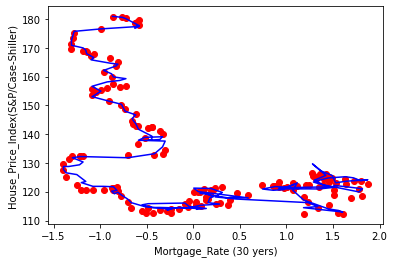

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 1.29
Accuracy: 99.0 %.


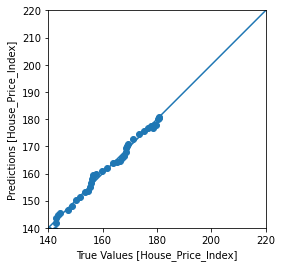

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9934523239953662

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,-1.244776
1,-6.687443
2,-6.482822
3,-1.279260
4,26.852754
5,6.723513
6,1.856439
7,-0.506464
8,-2.028788
9,-4.795612


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[122.60823693 121.56036207 121.77766253 120.94609629 120.50952764
 120.73032133 121.33487238 121.55602074 121.6934637  122.22804935
 123.36985025 124.28755905 124.80054187 125.21528891 124.81976779
 123.83586818 124.17372635 123.65848329 123.11037929 125.66232423
 127.18245794 129.66754648 127.55370055 125.70220432 123.97259572
 123.7304827  122.42132152 119.9396489  121.01884456 121.53625678
 122.21107694 121.50987688 120.95662762 120.99518041 120.98407189
 122.27843576 123.1128555  120.49103945 117.14954418 114.01844345
 113.50150474 112.9442715  114.4553876  114.83321195 116.21936484
 117.45427471 118.19874251 119.75912812 121.14294161 121.25043368
 120.06359995 117.87699525 118.03397798 117.88653261 118.52058081
 119.22264245 119.44449282 119.49862165 118.28425709 117.85044542
 116.20502697 115.70415727 115.29473961 114.38116412 114.42912198
 114.53874104 114.51975271 115.44123605 115.84400035 116.06735998
 114.82303602 114.18297796 113.89428833 114.18900769 114.57546652
 113.67268

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,122.608237
1,121.560362
2,121.777663
3,120.946096
4,120.509528
...,...
143,177.676742
144,177.692184
145,180.134200
146,180.599700


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,1.404440,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
Personal_Income,-1.735745,-1.679006,-1.622268,-1.565529,-1.508791,-1.452052,-1.395313,-1.338575,-1.281836,-1.225097,...,1.562278,1.604526,1.646773,1.689021,1.731269,1.783066,1.834864,1.886662,1.938459,1.990257
Resident_Population,-1.906107,-1.862238,-1.818369,-1.774500,-1.730631,-1.686762,-1.642893,-1.599024,-1.555155,-1.511286,...,1.625495,1.653929,1.682363,1.710797,1.739231,1.762935,1.786639,1.810343,1.834046,1.857750
Unemployment_Rate,-0.197467,-0.328229,-0.328229,-0.132087,-0.132087,-0.262848,-0.328229,-0.524371,-0.393609,-0.524371,...,-0.982035,-1.112796,-1.243558,-1.243558,-0.982035,-0.982035,-1.112796,-1.374319,-1.308938,-1.112796
GDP,-1.635203,-1.593633,-1.552062,-1.510492,-1.468922,-1.427351,-1.385781,-1.344210,-1.302640,-1.261070,...,1.704260,1.740720,1.777180,1.813640,1.850100,1.891469,1.932838,1.974206,2.015575,2.056944
Crime_Rate,2.111729,2.083420,2.055111,2.026801,1.998492,1.970183,1.941874,1.913564,1.885255,1.856946,...,-0.479859,-0.453739,-0.427619,-0.401499,-0.396817,-0.392135,-0.387453,-0.382771,-0.378089,-0.373407
Median_Debt,0.163787,0.210751,0.257715,0.304679,0.289612,0.274544,0.259476,0.309082,0.358688,0.408294,...,0.505451,0.698786,0.892121,1.085457,1.278498,1.471540,1.664582,1.842067,2.019552,2.197037
New_Structures,0.700038,1.630241,1.138342,1.451101,1.330696,1.992924,0.758772,1.091355,1.017203,1.564165,...,0.244114,0.940114,1.160367,0.657456,2.001734,1.164772,2.253557,0.644241,1.224241,1.711734
Economic_Conditions_Index,0.416941,0.651856,0.600175,0.717632,0.825693,0.496812,0.510907,0.539097,0.487416,0.478019,...,0.341769,0.290088,0.299484,0.304183,0.365260,0.318277,0.294786,0.182027,0.219613,0.299484
CPI all items less shelter,-2.460628,-2.383615,-2.306602,-2.229589,-2.152576,-2.075564,-1.998551,-1.921538,-1.844525,-1.767512,...,0.724304,0.736906,0.749508,0.762110,0.774712,0.812260,0.849808,0.887356,0.924904,0.962452


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,138,139,140,141,142,143,144,145,146,147
0,Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
1,Personal_Income,-1.735745,-1.679006,-1.622268,-1.565529,-1.508791,-1.452052,-1.395313,-1.338575,-1.281836,...,1.562278,1.604526,1.646773,1.689021,1.731269,1.783066,1.834864,1.886662,1.938459,1.990257
2,Resident_Population,-1.906107,-1.862238,-1.818369,-1.774500,-1.730631,-1.686762,-1.642893,-1.599024,-1.555155,...,1.625495,1.653929,1.682363,1.710797,1.739231,1.762935,1.786639,1.810343,1.834046,1.857750
3,Unemployment_Rate,-0.197467,-0.328229,-0.328229,-0.132087,-0.132087,-0.262848,-0.328229,-0.524371,-0.393609,...,-0.982035,-1.112796,-1.243558,-1.243558,-0.982035,-0.982035,-1.112796,-1.374319,-1.308938,-1.112796
4,GDP,-1.635203,-1.593633,-1.552062,-1.510492,-1.468922,-1.427351,-1.385781,-1.344210,-1.302640,...,1.704260,1.740720,1.777180,1.813640,1.850100,1.891469,1.932838,1.974206,2.015575,2.056944
5,Crime_Rate,2.111729,2.083420,2.055111,2.026801,1.998492,1.970183,1.941874,1.913564,1.885255,...,-0.479859,-0.453739,-0.427619,-0.401499,-0.396817,-0.392135,-0.387453,-0.382771,-0.378089,-0.373407
6,Median_Debt,0.163787,0.210751,0.257715,0.304679,0.289612,0.274544,0.259476,0.309082,0.358688,...,0.505451,0.698786,0.892121,1.085457,1.278498,1.471540,1.664582,1.842067,2.019552,2.197037
7,New_Structures,0.700038,1.630241,1.138342,1.451101,1.330696,1.992924,0.758772,1.091355,1.017203,...,0.244114,0.940114,1.160367,0.657456,2.001734,1.164772,2.253557,0.644241,1.224241,1.711734
8,Economic_Conditions_Index,0.416941,0.651856,0.600175,0.717632,0.825693,0.496812,0.510907,0.539097,0.487416,...,0.341769,0.290088,0.299484,0.304183,0.365260,0.318277,0.294786,0.182027,0.219613,0.299484
9,CPI all items less shelter,-2.460628,-2.383615,-2.306602,-2.229589,-2.152576,-2.075564,-1.998551,-1.921538,-1.844525,...,0.724304,0.736906,0.749508,0.762110,0.774712,0.812260,0.849808,0.887356,0.924904,0.962452


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),-1.244776
1,Personal_Income,-6.687443
2,Resident_Population,-6.482822
3,Unemployment_Rate,-1.279260
4,GDP,26.852754
5,Crime_Rate,6.723513
6,Median_Debt,1.856439
7,New_Structures,-0.506464
8,Economic_Conditions_Index,-2.028788
9,CPI all items less shelter,-4.795612


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

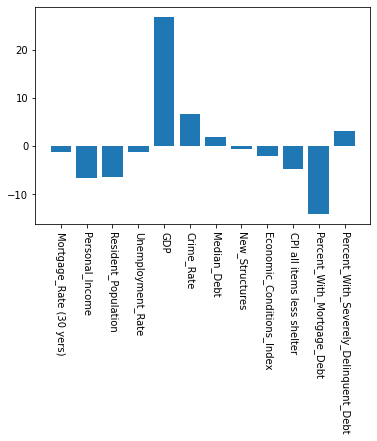

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,7/1/2017,178.50937,3.97,55367.00000,7396.426500,3.9,491972.3675,769.547183,34.97%,141250.6667,1.20%,4250,3.76,223.500500
1,8/1/2017,179.03170,3.88,55616.50000,7406.314750,3.9,494271.7254,770.566467,34.83%,141868.3333,1.20%,6620,3.91,223.875917
2,9/1/2017,179.73311,3.81,55866.00000,7416.203000,3.5,496571.0833,771.585750,34.70%,142486.0000,1.20%,4446,4.15,224.251333
3,10/1/2017,180.42716,3.90,56115.50000,7426.091250,3.3,498870.4413,772.605033,34.63%,143060.0000,1.27%,6459,4.03,224.626750
4,11/1/2017,180.64196,3.92,56365.00000,7435.979500,3.4,501169.7992,773.624317,34.57%,143634.0000,1.33%,3754,3.73,225.002167
5,12/1/2017,180.78713,3.95,56614.50000,7445.867750,3.3,503469.1571,774.643600,34.50%,144208.0000,1.40%,3631,3.54,225.377583
6,1/1/2018,181.23406,4.03,56864.00000,7455.756000,3.7,505768.5150,773.834725,34.57%,144725.6667,1.37%,5687,3.46,225.753000
7,2/1/2018,182.28582,4.33,57019.08333,7465.537667,3.7,507276.3032,773.025850,34.63%,145243.3333,1.33%,3979,3.59,226.013667
8,3/1/2018,183.58835,4.44,57174.16667,7475.319333,3.6,508784.0913,772.216975,34.70%,145761.0000,1.30%,4814,3.72,226.274333
9,4/1/2018,185.27276,4.47,57329.25000,7485.101000,3.3,510291.8795,771.408100,34.63%,146290.3333,1.23%,8213,3.81,226.535000


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,7/1/2017,178.50937,3.97,55367.0,7396.42650,3.9,491972.3675,769.547183,141250.6667,4250,3.76,223.500500,34.97,1.20
1,8/1/2017,179.03170,3.88,55616.5,7406.31475,3.9,494271.7254,770.566467,141868.3333,6620,3.91,223.875917,34.83,1.20
2,9/1/2017,179.73311,3.81,55866.0,7416.20300,3.5,496571.0833,771.585750,142486.0000,4446,4.15,224.251333,34.70,1.20
3,10/1/2017,180.42716,3.90,56115.5,7426.09125,3.3,498870.4413,772.605033,143060.0000,6459,4.03,224.626750,34.63,1.27
4,11/1/2017,180.64196,3.92,56365.0,7435.97950,3.4,501169.7992,773.624317,143634.0000,3754,3.73,225.002167,34.57,1.33


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3.97,55367.00000,7396.426500,3.9,491972.3675,769.547183,141250.6667,4250,3.76,223.500500,34.97,1.20
1,3.88,55616.50000,7406.314750,3.9,494271.7254,770.566467,141868.3333,6620,3.91,223.875917,34.83,1.20
2,3.81,55866.00000,7416.203000,3.5,496571.0833,771.585750,142486.0000,4446,4.15,224.251333,34.70,1.20
3,3.90,56115.50000,7426.091250,3.3,498870.4413,772.605033,143060.0000,6459,4.03,224.626750,34.63,1.27
4,3.92,56365.00000,7435.979500,3.4,501169.7992,773.624317,143634.0000,3754,3.73,225.002167,34.57,1.33
5,3.95,56614.50000,7445.867750,3.3,503469.1571,774.643600,144208.0000,3631,3.54,225.377583,34.50,1.40
6,4.03,56864.00000,7455.756000,3.7,505768.5150,773.834725,144725.6667,5687,3.46,225.753000,34.57,1.37
7,4.33,57019.08333,7465.537667,3.7,507276.3032,773.025850,145243.3333,3979,3.59,226.013667,34.63,1.33
8,4.44,57174.16667,7475.319333,3.6,508784.0913,772.216975,145761.0000,4814,3.72,226.274333,34.70,1.30
9,4.47,57329.25000,7485.101000,3.3,510291.8795,771.408100,146290.3333,8213,3.81,226.535000,34.63,1.23


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.155000,0.298374,3.810000,3.915000,4.000000,4.447500,4.590000
Personal_Income,12.0,56621.229167,755.604324,55367.000000,56053.125000,56739.250000,57212.937503,57639.416670
Resident_Population,12.0,7450.678646,35.484763,7396.426500,7423.619188,7450.811875,7477.764750,7504.664333
Unemployment_Rate,12.0,3.566667,0.249848,3.300000,3.300000,3.550000,3.750000,3.900000
GDP,12.0,503629.373858,7079.089225,491972.367500,498295.601800,504618.836050,509161.038350,513307.455800
Crime_Rate,12.0,771.953965,1.647900,769.547183,770.591035,771.901363,773.175467,774.643600
Median_Debt,12.0,144391.333333,1981.819411,141250.666700,142916.500000,144466.833350,145893.333325,147349.000000
New_Structures,12.0,5205.916667,1385.369098,3631.000000,4182.250000,4809.500000,5974.500000,8213.000000
Economic_Conditions_Index,12.0,3.842500,0.259059,3.460000,3.687500,3.785000,4.060000,4.250000
CPI all items less shelter,12.0,225.421854,1.177305,223.500500,224.532896,225.565292,226.339500,227.056333


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.799467,2.042054,1.881454,-1.112796,2.098313,-0.368725,2.378338,0.677279,0.214915,1.000000,-1.887362,-1.789176
1,-0.885706,2.093852,1.905157,-1.112796,2.139682,-0.364043,2.559639,2.417279,0.285389,1.037548,-1.934065,-1.789176
2,-0.952782,2.145650,1.928861,-1.374319,2.181051,-0.359361,2.740939,0.821177,0.398148,1.075096,-1.977432,-1.789176
3,-0.866542,2.197447,1.952565,-1.505080,2.222419,-0.354679,2.909423,2.299076,0.341769,1.112644,-2.000784,-1.715475
4,-0.847378,2.249245,1.976269,-1.439700,2.263788,-0.349997,3.077906,0.313127,0.200820,1.150192,-2.020799,-1.652303
5,-0.818631,2.301042,1.999972,-1.505080,2.305157,-0.345315,3.246390,0.222823,0.111553,1.187740,-2.044150,-1.578601
6,-0.741973,2.352840,2.023676,-1.243558,2.346526,-0.349030,3.398338,1.732291,0.073966,1.225288,-2.020799,-1.610188
7,-0.454507,2.385036,2.047124,-1.243558,2.373653,-0.352746,3.550286,0.478317,0.135044,1.251359,-2.000784,-1.652303
8,-0.349103,2.417232,2.070573,-1.308938,2.400781,-0.356461,3.702235,1.091355,0.196122,1.277430,-1.977432,-1.683889
9,-0.320356,2.449429,2.094021,-1.505080,2.427908,-0.360177,3.857607,3.586823,0.238406,1.303501,-2.000784,-1.757590


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[182.98110984 183.52485421 185.93585584 186.70548089 189.15231292
 190.77082716 189.90758322 190.13454449 189.71290828 189.17095244
 190.54069531 190.19468535]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,182.981110
1,183.524854
2,185.935856
3,186.705481
4,189.152313
5,190.770827
6,189.907583
7,190.134544
8,189.712908
9,189.170952
